<a href="https://colab.research.google.com/github/tiago909/Analytics/blob/master/enova_case_Tiago_Moraes_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Data Loading

In [ ]:
df = pd.read_csv('training.csv',encoding='utf-8')

In [ ]:
df.head()

,id,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Price,Retail,LogPrice,LogRetail
0,1,0.41,NaN,SI1,L,,65.4,None,False,4.65x4.62x3.03,Very good,Other/Unknown,Princess,Good,NaN,1,$ 430,$ 850,6.063785,6.745236
1,2,0.42,AGSL,SI2,L,,61.7,Strong Bl..,False,4.85x4.79x2.98,Excellent,Russia,Marquise,Very good,NaN,1,$ 560,$ 920,6.327937,6.824374
2,3,0.40,AGSL,SI1,L,,64.0,None,False,4.66x4.63x2.97,Excellent,South Africa,Round,Excellent,57.0,1,$ 560,$ 575,6.327937,6.354370
3,4,0.41,AGSL,SI2,L,,62.7,Strong Bl..,False,4.71x4.69x2.95,Very good,Botswana,Round,Very good,58.0,1,$ 560,$ 825,6.327937,6.715383
4,5,0.40,AGSL,SI1,L,,63.0,NaN,False,4.71x4.68x2.96,Excellent,Botswana,Round,Very good,58.0,1,$ 580,$ 890,6.363028,6.791221


# Feature adapting 

In [ ]:
#check how data is been read
df.dtypes

id                          int64
Carats                    float64
Cert                       object
Clarity                    object
Color                      object
Cut                        object
Depth                     float64
Fluroescence               object
Known_Conflict_Diamond       bool
Measurements               object
Polish                     object
Regions                    object
Shape                      object
Symmetry                   object
Table                     float64
Vendor                      int64
Price                      object
Retail                     object
LogPrice                  float64
LogRetail                 float64
dtype: object

In [ ]:
#Vendor as object not int
df = df.astype({'Vendor': 'object'})

In [ ]:
#calculating exponential from log columns of price and retail
df['Price_int'] = np.exp(df['LogPrice'])
df['Retail_int'] = np.exp(df['LogRetail'])
#droping previous columns of retail and retial
df = df.drop(['Price', 'Retail'], axis=1)

In [ ]:
# Discovered that Measurements column had lots of charecthers that needed to be replaced
df['Measurements'] = df['Measurements'].str.replace('*','x')
df['Measurements'] = df['Measurements'].str.replace('X','x')
df['Measurements'] = df['Measurements'].str.replace('-','x')
df['Measurements'] = df['Measurements'].str.replace('+','x')

In [ ]:
# Finaly spliting the column in 3 others
df[['High', 'Length', 'Width']] = df['Measurements'].str.split('x', 3, expand=True)

In [ ]:
#chekcing if we are missing any value to be replaced  
print(df[pd.to_numeric(df['High'], errors='coerce').isnull()])

Empty DataFrame
Columns: [id, Carats, Cert, Clarity, Color, Cut, Depth, Fluroescence, Known_Conflict_Diamond, Measurements, Polish, Regions, Shape, Symmetry, Table, Vendor, LogPrice, LogRetail, Price_int, Retail_int, High, Length, Width]
Index: []


In [ ]:
#getting those 3 new columns to float64
df = df.astype({'High': 'float64'})
df = df.astype({'Length': 'float64'})
df = df.astype({'Width': 'float64'})

In [ ]:
df.dtypes

id                          int64
Carats                    float64
Cert                       object
Clarity                    object
Color                      object
Cut                        object
Depth                     float64
Fluroescence               object
Known_Conflict_Diamond       bool
Measurements               object
Polish                     object
Regions                    object
Shape                      object
Symmetry                   object
Table                     float64
Vendor                     object
LogPrice                  float64
LogRetail                 float64
Price_int                 float64
Retail_int                float64
High                      float64
Length                    float64
Width                     float64
dtype: object

In [ ]:
# creating a new column with the estimated volume
df['Volume'] = df['High']*df['Length']*df['Width']

In [ ]:
# new column for profit 
df['Profit'] = df['Retail_int']-df['Price_int']

# Data Cleaning

In [ ]:
#check number of lines and columns
df.shape

(8050, 25)

In [ ]:
# The percentage from each value inside the object columns 
col_obj = ['Known_Conflict_Diamond', 'Cert', 'Polish', 'Vendor', 'Cut', 'Symmetry', 'Regions', 'Clarity',
     'Fluroescence', 'Shape', 'Table', 'Color']

for i in col_obj:
  print( i , "\n", df[i].value_counts()/len(df)*100, "\n")

Known_Conflict_Diamond 
 False    96.161491
True      3.838509
Name: Known_Conflict_Diamond, dtype: float64 

Cert 
 AGSL     86.621118
GemEx     6.521739
Name: Cert, dtype: float64 

Polish 
 Excellent    66.869565
Very good    19.739130
             11.167702
Good          2.223602
Name: Polish, dtype: float64 

Vendor 
 2    40.260870
1    33.565217
3    13.739130
4    12.434783
Name: Vendor, dtype: float64 

Cut 
              48.720497
Excellent    34.919255
Very good    13.950311
Good          2.211180
Fair          0.186335
Ideal         0.012422
Name: Cut, dtype: float64 

Symmetry 
 Excellent    59.118012
Very good    24.596273
             11.167702
Good          4.869565
Fair          0.198758
Faint         0.037267
Execllent     0.012422
Name: Symmetry, dtype: float64 

Regions 
 Russia           32.285714
Botswana         17.863354
Australia        11.018634
DR Congo          9.888199
Canada            9.254658
Angola            7.279503
South Africa      6.906832
Other/Un

In [ ]:
# Dataframe had empty cells not filled with Nan
df_empty_na = df.replace(' ', np.nan)

In [ ]:
# No faint classification on Simmetry
df_empty_na['Symmetry'].replace({ 'Faint':np.nan, 'Execllent':'Excellent'}, inplace=True)

In [ ]:
# No "ideal" classification for Cut. It is related to the proportions
df_empty_na['Cut'] = df_empty_na['Cut'].replace('Ideal', np.nan)

In [ ]:
# No N classification for clarity
df_empty_na['Clarity'] = df_empty_na['Clarity'].replace('N', np.nan)

In [ ]:
# Flourecense has other know classifications that will be substituted (None, Faint, Medium, Strong, Very Strong)
df_empty_na['Fluroescence'].replace({ 'Strong Bl..':'Strong', 'Medium Bl..':'Medium', 
                                     'Medium Ye..':'Medium', 'Very Stro..':'Very Strong',
                                     'Medium B':'Medium', 'Strong B':'Strong', 'Faint Y':'Faint',
                                     'Very Smal..':'Faint'}, inplace=True)

In [ ]:
#Shape classification
df_empty_na['Shape'].replace({ 'ROUND':'Round', 'Oval ':'Oval', 'Marquis':'Marquise',
                              'Marwuise':'Marquise'}, inplace=True)

In [ ]:
#Color classification. All F"something" will be grouped and Fancy
df_empty_na['Color'].replace({ 'O-p':'N-R', 'W':'S-Z', 'Fly':'Fancy', 'Ffcg':'Fancy', 'Fiy':'Fancy', 'P':'N-R',
                              'Ffcy':'Fancy', 'Fdpink':'Fancy','Gy':np.nan,  'Fiyellow':'Fancy', 'Lb':np.nan,  
                              'S':'S-Z', 'Q-r':'N-R', 'Ffg':'Fancy', 'Flyellow':'Fancy', 'U': 'S-Z',
                              'Fyellow':'Fancy', 'Fdy':'Fancy', 'Fvyellow':'Fancy', 'Ffcdbrown':'Fancy',
                              'Ffcly':'Fancy', 'N':'N-R'}, inplace=True)

In [ ]:
# check the % of NaN values within the columns.
df_empty_na.isna().sum()/len(df_empty_na)

id                        0.000000
Carats                    0.000000
Cert                      0.068571
Clarity                   0.000248
Color                     0.000248
Cut                       0.487329
Depth                     0.178882
Fluroescence              0.179503
Known_Conflict_Diamond    0.000000
Measurements              0.000000
Polish                    0.111677
Regions                   0.000000
Shape                     0.000000
Symmetry                  0.112050
Table                     0.314410
Vendor                    0.000000
LogPrice                  0.000000
LogRetail                 0.000000
Price_int                 0.000000
Retail_int                0.000000
High                      0.000000
Length                    0.000000
Width                     0.000000
Volume                    0.000000
Profit                    0.000000
dtype: float64

In [ ]:
#Droping Nan, knowing that we will lose at least 48% from the base.
df_no_na = df_empty_na.dropna()
df_no_na.shape
#Dataframe ends up with only 1893 points vs 8050 that we have started

(1893, 25)

In [ ]:
#Another option is to drop the columns with high % of Nan from the study
# This option only considers droping Cut column
df_no_cut = df_empty_na.drop(['Cut'], axis=1)
df_no_na_no_cut = df_no_cut.dropna()
df_no_na_no_cut.shape

(3192, 24)

In [ ]:
#Another option is to drop the columns with high % of Nan from the study
# This option only considers droping Cut and Table columns
# Further on the study it was seen that those 3 coluns do not have a signifcant effect on the model
# so we took them off the modeling part and run new models without them
df_no_na_no_cut_table_flou = df_empty_na.drop(['Cut', 'Table', 'Fluroescence'], axis=1)
df_no_na_no_cut_table = df_no_na_no_cut_table_flou.dropna()
df_no_na_no_cut_table.shape

(5464, 22)

In [ ]:
#Vendor as object not int
df_no_na_no_cut_table = df_no_na_no_cut_table.astype({'Vendor': 'object'})

In [ ]:
df_no_na_no_cut_table.dtypes

id                          int64
Carats                    float64
Cert                       object
Clarity                    object
Color                      object
Depth                     float64
Known_Conflict_Diamond       bool
Measurements               object
Polish                     object
Regions                    object
Shape                      object
Symmetry                   object
Vendor                     object
LogPrice                  float64
LogRetail                 float64
Price_int                 float64
Retail_int                float64
High                      float64
Length                    float64
Width                     float64
Volume                    float64
Profit                    float64
dtype: object

# Analysis 

In [ ]:
# Initial analysis from each column of numerical values
df_no_na_no_cut_table.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5464.0,4248.290081,2332.240495,2.000000,2260.500000,4455.500000,6239.500000,8.050000e+03
Carats,5464.0,1.278785,0.907602,0.400000,0.700000,1.040000,1.520000,1.192000e+01
Depth,5464.0,61.717478,1.813462,0.000000,60.900000,62.000000,62.600000,6.850000e+01
LogPrice,5464.0,8.838830,1.239491,5.978886,7.902857,8.905851,9.652295,1.389965e+01
LogRetail,5464.0,9.162568,1.296254,3.806662,8.207947,9.283126,9.998570,1.433144e+01
Price_int,5464.0,15837.349927,38059.104411,395.000000,2705.000000,7375.000000,15557.500000,1.087785e+06
Retail_int,5464.0,22558.641105,54567.198060,45.000000,3670.000000,10755.000000,21995.000000,1.675190e+06
High,5464.0,6.671790,1.362872,4.590000,5.640000,6.540000,7.380000,1.588000e+01
Length,5464.0,6.684610,1.378728,4.550000,5.630000,6.560000,7.412500,1.580000e+01
Width,5464.0,4.120595,0.833014,2.650000,3.500000,4.030000,4.570000,8.540000e+00


In [ ]:
df_no_na_no_cut_table.describe(exclude=[np.number]).T

,count,unique,top,freq
Cert,5464,2,AGSL,5076
Clarity,5464,12,SI1,1541
Color,5464,13,G,802
Known_Conflict_Diamond,5464,2,False,5249
Measurements,5464,5158,5.07x5.03x3.18,4
Polish,5464,3,Excellent,4103
Regions,5464,9,Russia,1756
Shape,5464,10,Round,3112
Symmetry,5464,4,Excellent,3627
Vendor,5464,4,2,2218


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Price evaluation

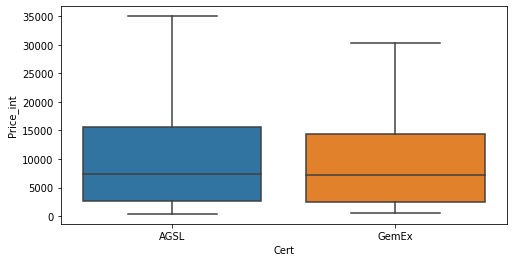

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Cert', y='Price_int', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# No percieved diference in price for AGSL and GemEx classification

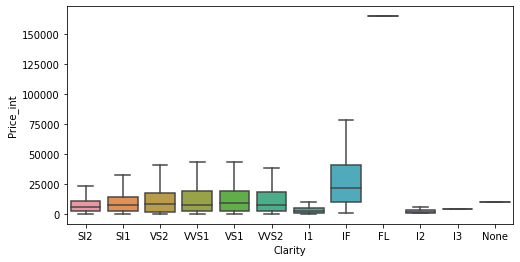

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Clarity', y='Price_int', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# I classifications with lower range of prices. S to IF with clear price increase. FL with only two 
# measurments having a significant variation from other classifications.

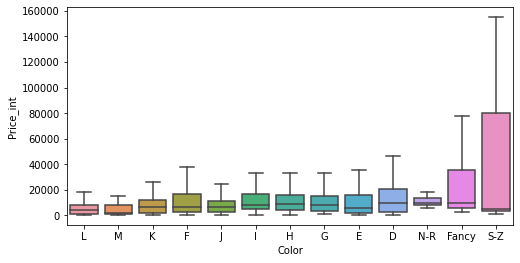

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Color', y='Price_int', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# Percieved median variation based on color classification.
# N-R, Fancy and S-Z with atypical variations based on the number of samples.

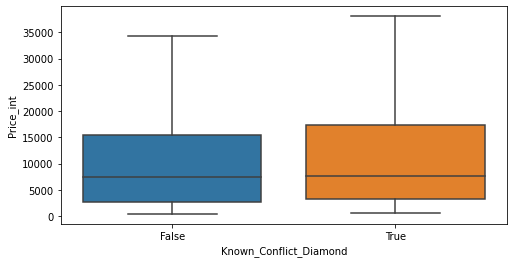

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Known_Conflict_Diamond', y='Price_int', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# Did not expected to see no variation from diamonds based on the conflict classificartion

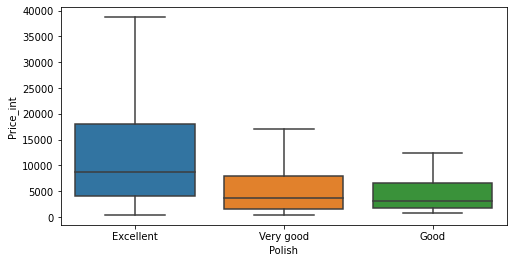

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Polish', y='Price_int', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# Important role in price variation 

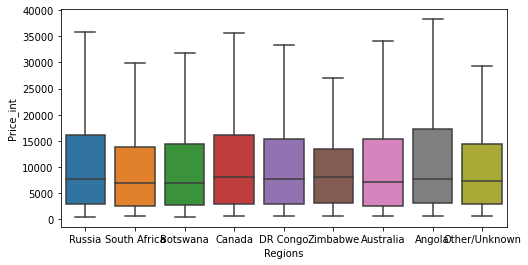

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Regions', y='Price_int', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# No percieved variation based on the region 

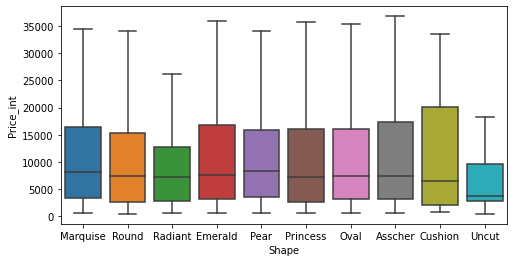

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Shape', y='Price_int', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# No signifcant variation based on the shapes

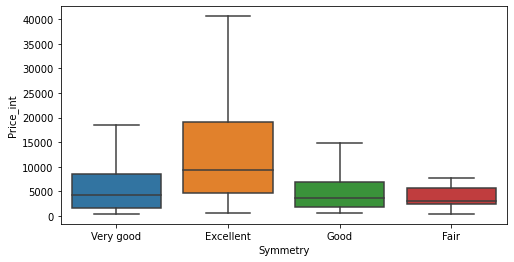

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Symmetry', y='Price_int', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# Only excellent symmetry with significant variation on price

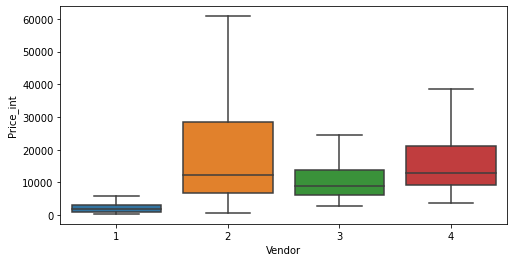

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Vendor', y='Price_int', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# Vendor 1 calling our atention.

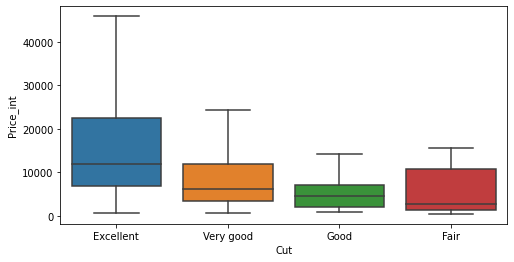

In [ ]:
# checking Cut data for curiosity
plt.figure(figsize=(8,4))
sns.boxplot(x='Cut', y='Price_int', data=df_no_na, showfliers=False)
plt.show()
# Cut bringin some important variation

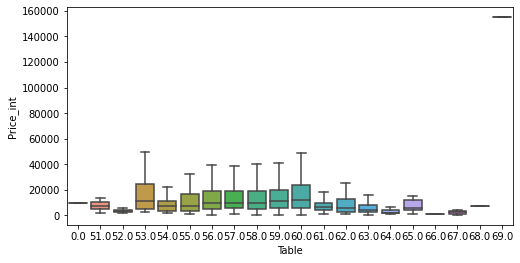

In [ ]:
# checking Table data for curiosity
plt.figure(figsize=(8,4))
sns.boxplot(x='Table', y='Price_int', data=df_no_na, showfliers=False)
plt.show()
# might not be that significant

Profit Evaluation

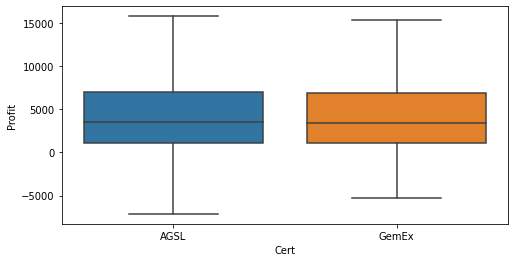

In [ ]:
# Visualization from profit and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Cert', y='Profit', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# No percieved diference in price for AGSL and GemEx classification

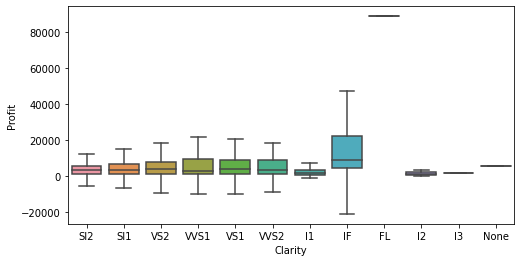

In [ ]:
# Visualization from profit and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Clarity', y='Profit', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
#similar variation of profit when compared with the prices

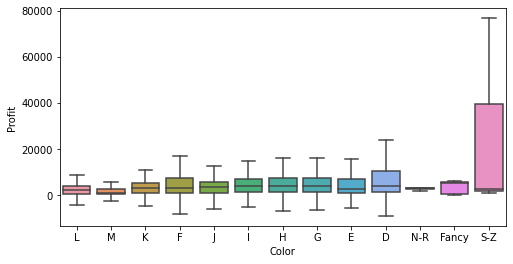

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Color', y='Profit', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
#similar variation of profit when compared with the prices

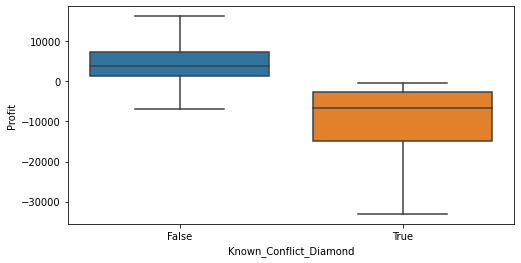

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Known_Conflict_Diamond', y='Profit', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# Now here we can see some difference in profit based on conflict

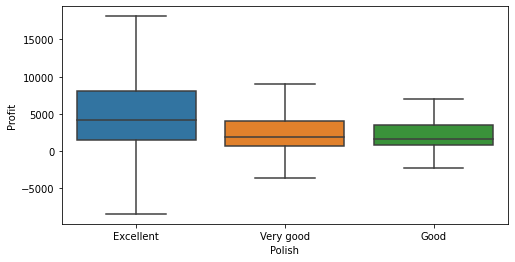

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Polish', y='Profit', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
#similar variation of profit when compared with the prices

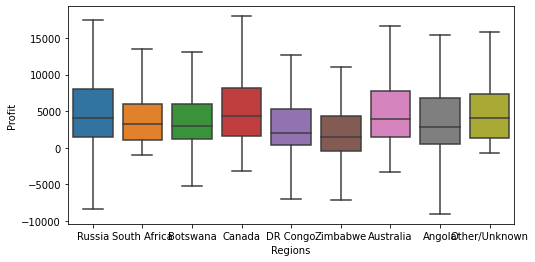

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Regions', y='Profit', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# We can see a long tail in profit for african countries. Might be related with conflit zones

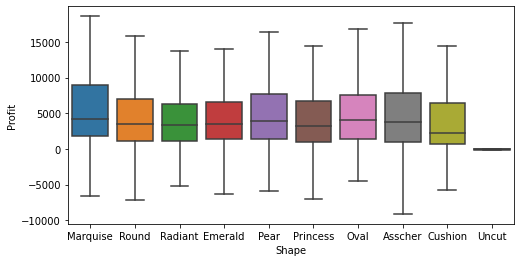

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Shape', y='Profit', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
#similar variation of profit when compared with the prices

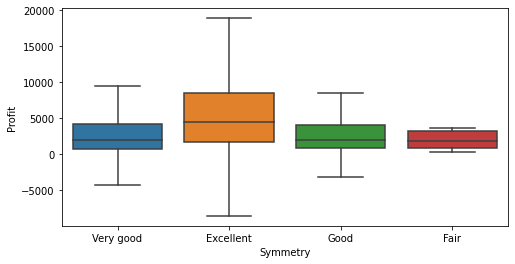

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Symmetry', y='Profit', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
#similar variation of profit when compared with the prices, but excellent having a bit more differentiation

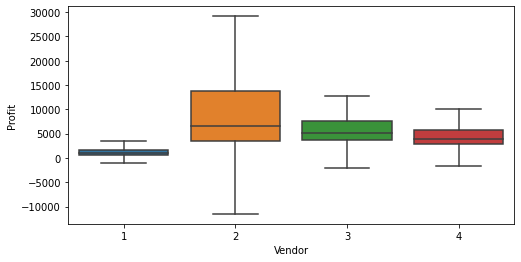

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Vendor', y='Profit', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# Vendor 1 having lower prices do not mean great profit. 

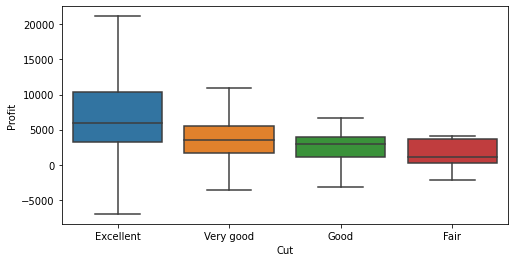

In [ ]:
# checking Cut data for curiosity
plt.figure(figsize=(8,4))
sns.boxplot(x='Cut', y='Profit', data=df_no_na, showfliers=False)
plt.show()
#similar variation of profit when compared with the prices

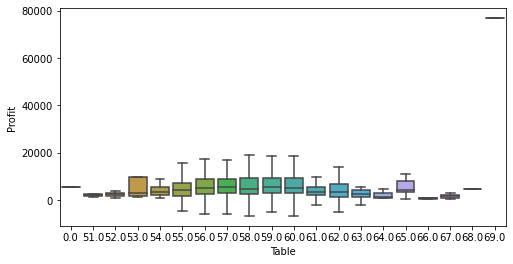

In [ ]:
# checking Table data for curiosity
plt.figure(figsize=(8,4))
sns.boxplot(x='Table', y='Profit', data=df_no_na, showfliers=False)
plt.show()
#similar variation of profit when compared with the prices

# Modelling for LogRetail
LogRetail column had better r2 scores when compared with its own retail price. High dispersion on retail values explain why logretail give us better r2 values. 

All 4 models tested (random forest, decision tree, lgbm, linear regression) gave us good r2 results, but LGBM excell on it. r2 from test sample was higher then r2 from trainin linregression model, therefore the linregression was abondoned from the study.

Also it was noticed that the columns Cut, Table and Flourescence that have lots of missing information in the "offers" dataframe did not have any impact on the performance of the models.

By taking those tree columns out of the study will help to have more data in the "offers" file and have more options to consider in this case.

First for Profit

In [ ]:
# X and Y for profit
y_profit = df_no_na_no_cut_table['LogRetail']
X_profit = df_no_na_no_cut_table.drop(['Profit', 'id', 'Measurements','LogPrice', 'LogRetail', 'Price_int', 'Retail_int'], axis=1)

In [ ]:
# categorical data classification to dummies
X_profit_dmm = pd.get_dummies(X_profit)

In [ ]:
X_profit_dmm.head()

,Carats,Depth,Known_Conflict_Diamond,High,Length,Width,Volume,Cert_AGSL,Cert_GemEx,Clarity_FL,Clarity_I1,Clarity_I2,Clarity_I3,Clarity_IF,Clarity_None,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_M,Color_N-R,Color_S-Z,Polish_Excellent,Polish_Good,Polish_Very good,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquise,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Shape_Uncut,Symmetry_Excellent,Symmetry_Fair,Symmetry_Good,Symmetry_Very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4
1,0.42,61.7,False,4.85,4.79,2.98,69.229870,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0.40,64.0,False,4.66,4.63,2.97,64.080126,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,0.41,62.7,False,4.71,4.69,2.95,65.165205,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,0.40,63.0,False,4.71,4.68,2.96,65.246688,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
5,0.40,59.9,False,4.75,4.74,2.84,63.942600,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# making a train test split 
Xtrain_prof, Xtest_prof, ytrain_prof, ytest_proft = train_test_split(X_profit_dmm, y_profit, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rand_for  = RandomForestRegressor(random_state=42)

In [ ]:
parameters_rand_for = {'max_depth':[18, 14, 22], 'min_samples_split':[ 10, 20, 50], 'min_samples_leaf':[4, 6, 8, 10], 'n_estimators':[10,80,100,120]}

In [ ]:
grid_rand_for = GridSearchCV(model_rand_for, parameters_rand_for, cv=5, scoring='r2')

In [ ]:
fit_rand_for = grid_rand_for.fit(Xtrain_prof,ytrain_prof)

In [ ]:
fit_rand_for.best_params_

{'max_depth': 18,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 80}

In [ ]:
best_rand_for = RandomForestRegressor(**fit_rand_for.best_params_)

In [ ]:
best_rand_for = best_rand_for.fit(Xtrain_prof,ytrain_prof)

In [ ]:
best_rand_for

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred_rand_for_train = best_rand_for.predict(Xtrain_prof)

In [ ]:
print("r2 with train data: ",r2_score(ytrain_prof, pred_rand_for_train))

r2 with train data:  0.9814984077169359


In [ ]:
pred_rand_for_test = best_rand_for.predict(Xtest_prof)

In [ ]:
print("r2 with test data: ",r2_score(ytest_proft, pred_rand_for_test))
# Seems a good model

r2 with test data:  0.9606490437810512


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_tree  = DecisionTreeRegressor(random_state=42)

In [ ]:
parameters_tree = {'max_depth':[18, 14, 22], 'min_samples_split':[ 10, 20, 50], 'min_samples_leaf':[4, 6, 8, 10]}

In [ ]:
grid_tree = GridSearchCV(model_tree, parameters_tree, cv=5, scoring='r2')

In [ ]:
fit_tree = grid_tree.fit(Xtrain_prof,ytrain_prof)

In [ ]:
fit_tree.best_params_

{'max_depth': 18, 'min_samples_leaf': 4, 'min_samples_split': 20}

In [ ]:
best_tree = DecisionTreeRegressor(**fit_tree.best_params_)

In [ ]:
best_tree = best_tree.fit(Xtrain_prof,ytrain_prof)

In [ ]:
pred_tree_train = best_tree.predict(Xtrain_prof)

In [ ]:
print("r2 with train data: ",r2_score(ytrain_prof, pred_tree_train))

r2 with train data:  0.9766454048659231


In [ ]:
pred_tree_test = best_tree.predict(Xtest_prof)

In [ ]:
print("r2 with test data: ",r2_score(ytest_proft, pred_tree_test))

r2 with test data:  0.9507196398343798


LGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
model_lgbm = LGBMRegressor(random_state=42)

In [ ]:
parameters_lgbm = {'num_leaves': [27, 127, 302], 
              'learning_rate': [0.001, 0.05, 0.5],
              'boosting_type' : ['gbdt', 'dart'],
              'max_depth': [3, 11],       
              'n_estimators':[10,80,100,120]}

In [ ]:
grid_lgbm= GridSearchCV(model_lgbm, parameters_lgbm, cv=5, scoring='r2')

In [ ]:
fit_lgbm = grid_lgbm.fit(Xtrain_prof,ytrain_prof)

In [ ]:
fit_lgbm.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 120,
 'num_leaves': 27}

In [ ]:
best_lgbm = LGBMRegressor(**fit_lgbm.best_params_)

In [ ]:
best_lgbm = best_lgbm.fit(Xtrain_prof,ytrain_prof)

In [ ]:
pred_lgbm_train = best_lgbm.predict(Xtrain_prof)

In [ ]:
print("r2 with train data: ",r2_score(ytrain_prof, pred_lgbm_train))

r2 with train data:  0.9867400249446139


In [ ]:
pred_lgbm_test = best_lgbm.predict(Xtest_prof)

In [ ]:
print("r2 with test data: ",r2_score(ytest_proft, pred_lgbm_test))
# similar performance as the other models

r2 with test data:  0.9781525006962313


Linear Regression

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


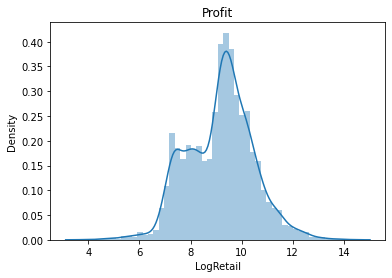

In [ ]:
sns.distplot(y_profit)
plt.title('Profit')
plt.show()
# looks like a normal curve, so we will consider it as one

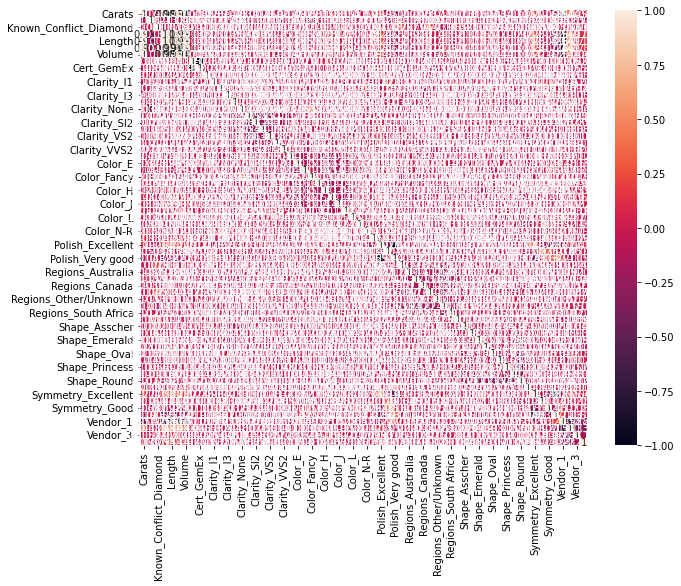

In [ ]:
# Too hard to see for variable correlations on the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(X_profit_dmm.corr(), annot=True)
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
X_lin_reg = Xtrain_prof.astype({'Known_Conflict_Diamond': 'object'})

In [ ]:
X_const = pd.get_dummies(X_lin_reg)

In [ ]:
X_const = sm.add_constant(X_const)

In [ ]:
X_const = X_const.drop(['Carats', 'Clarity_I3', 'Color_L', 'Color_M', 'Color_N-R', 'Color_S-Z', 'Shape_Uncut', 'Clarity_I1', 'Clarity_I2', 'Clarity_IF', 
                        'Clarity_None', 'Clarity_SI1', 'Clarity_SI2', 'Clarity_VS1', 'Clarity_VS2', 
                        'Clarity_VVS1', 'Clarity_VVS2'], axis=1)

In [ ]:
multmodelin_prof = sm.OLS(ytrain_prof,X_const)
multmodelin_prof = multmodelin_prof.fit()
print(multmodelin_prof.summary(alpha=0.10))
# Didnt followed the next steps to evaluate the linear regresion model because it was the lower performer from all.

                            OLS Regression Results                            
Dep. Variable:              LogRetail   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2432.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:38:59   Log-Likelihood:                -169.61
No. Observations:                4098   AIC:                             425.2
Df Residuals:                    4055   BIC:                             696.9
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------------------------
const           

# Feature Importance for Logretail

In [ ]:
!pip install shap

In [ ]:
import shap

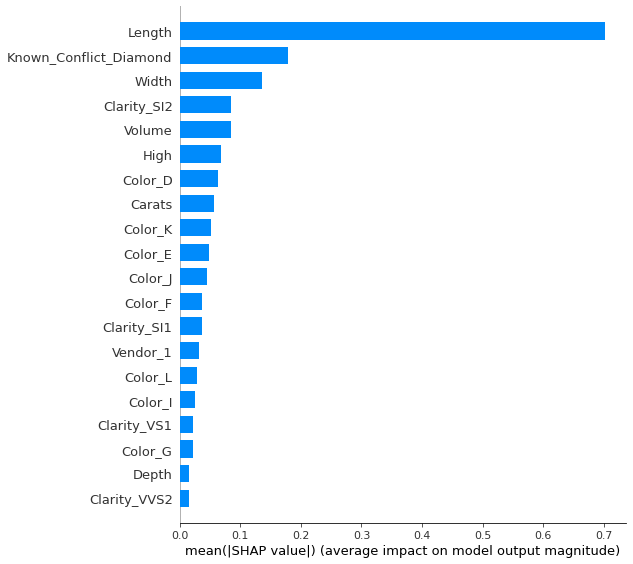

In [ ]:
explainer =  shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(Xtrain_prof.values)
shap.summary_plot(shap_values, Xtrain_prof, plot_type='bar')

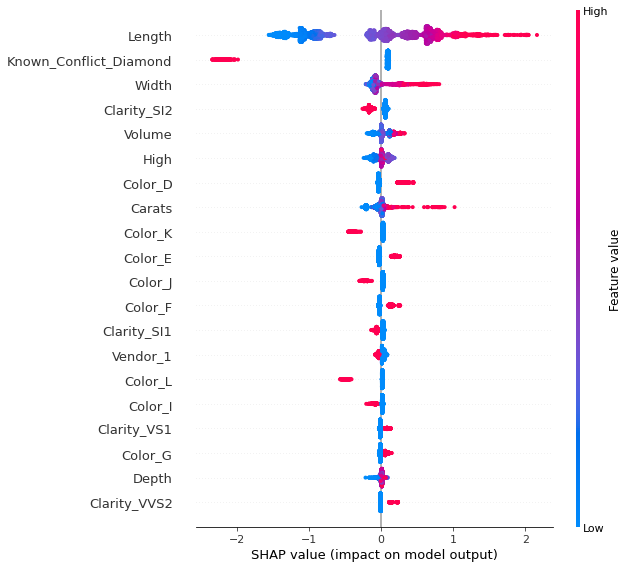

In [ ]:
explainer =  shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(Xtrain_prof.values)
shap.summary_plot(shap_values, Xtrain_prof)

# Modelling Logprice
All 3 models (random forest, decision tree and lgbm) gave us good results, but again lgbm excell on it.

Also Loprices gave us better results than price itself.

Also it was noticed that the columns Cut, Table and Flourescence that have lots of missing information in the "offers" dataframe did not have any impact on the performance of the models.

By taking those tree columns out of the study will help to have more data in the "offers" file and have more options to consider in this case.

Now for Price

In [ ]:
# X and Y for profit
y_price = df_no_na_no_cut_table['LogPrice']
X_price = df_no_na_no_cut_table.drop(['Profit', 'id', 'Measurements','LogPrice', 'LogRetail', 'Price_int', 'Retail_int'], axis=1)

In [ ]:
# categorical data classification to dummies
X_price_dmm = pd.get_dummies(X_price)

In [ ]:
X_price_dmm.head()

,Carats,Depth,Known_Conflict_Diamond,High,Length,Width,Volume,Cert_AGSL,Cert_GemEx,Clarity_FL,Clarity_I1,Clarity_I2,Clarity_I3,Clarity_IF,Clarity_None,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_M,Color_N-R,Color_S-Z,Polish_Excellent,Polish_Good,Polish_Very good,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquise,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Shape_Uncut,Symmetry_Excellent,Symmetry_Fair,Symmetry_Good,Symmetry_Very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4
1,0.42,61.7,False,4.85,4.79,2.98,69.229870,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0.40,64.0,False,4.66,4.63,2.97,64.080126,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
3,0.41,62.7,False,4.71,4.69,2.95,65.165205,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,0.40,63.0,False,4.71,4.68,2.96,65.246688,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
5,0.40,59.9,False,4.75,4.74,2.84,63.942600,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [ ]:
# making a train test split 
Xtrain_price, Xtest_price, ytrain_price, ytest_price = train_test_split(X_price_dmm, y_price, test_size = 0.15, random_state = 42)

Random Forest

In [ ]:
model_rand_for_price  = RandomForestRegressor(random_state=42)

In [ ]:
parameters_rand_for_price = {'max_depth':[18, 14, 22], 'min_samples_split':[ 10, 20, 50], 'min_samples_leaf':[4, 6, 8, 10], 'n_estimators':[10,80,100,120]}

In [ ]:
grid_rand_for_price = GridSearchCV(model_rand_for_price, parameters_rand_for_price, cv=5, scoring='r2')

In [ ]:
fit_rand_for_price = grid_rand_for_price.fit(Xtrain_price,ytrain_price)

In [ ]:
fit_rand_for_price.best_params_

{'max_depth': 22,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 120}

In [ ]:
best_rand_for_price = RandomForestRegressor(**fit_rand_for_price.best_params_)

In [ ]:
best_rand_for_price = best_rand_for_price.fit(Xtrain_price,ytrain_price)

In [ ]:
pred_rand_for_train_price = best_rand_for_price.predict(Xtrain_price)

In [ ]:
print("r2 with train data: ",r2_score(ytrain_price, pred_rand_for_train_price))

r2 with train data:  0.9877999799031044


In [ ]:
pred_rand_for_test_price = best_rand_for_price.predict(Xtest_price)

In [ ]:
print("r2 with test data: ",r2_score(ytest_price, pred_rand_for_test_price))

r2 with test data:  0.9748837715106056


Decision Tree

In [ ]:
model_tree_price  = DecisionTreeRegressor(random_state=42)

In [ ]:
parameters_tree_price = {'max_depth':[18, 14, 22], 'min_samples_split':[ 10, 20, 50], 'min_samples_leaf':[4, 6, 8, 10]}

In [ ]:
grid_tree_price = GridSearchCV(model_tree_price, parameters_tree_price, cv=5, scoring='r2')

In [ ]:
fit_tree_price = grid_tree_price.fit(Xtrain_price,ytrain_price)

In [ ]:
fit_tree_price.best_params_

{'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 20}

In [ ]:
best_tree_price = DecisionTreeRegressor(**fit_tree_price.best_params_)

In [ ]:
best_tree_price = best_tree_price.fit(Xtrain_price,ytrain_price)

In [ ]:
pred_tree_train_price = best_tree_price.predict(Xtrain_price)

In [ ]:
print("r2 with train data: ",r2_score(ytrain_price, pred_tree_train_price))

r2 with train data:  0.9816816056319869


In [ ]:
pred_tree_test_price = best_tree_price.predict(Xtest_price)

In [ ]:
print("r2 with test data: ",r2_score(ytest_price, pred_tree_test_price))
#Again we are loosing lots of prediction power with decision tree

r2 with test data:  0.9668072092273373


LGBM

In [ ]:
model_lgbm_price = LGBMRegressor(random_state=42)

In [ ]:
parameters_lgbm_price = {'num_leaves': [27, 127, 302], 
              'learning_rate': [0.001, 0.05, 0.5],
              'boosting_type' : ['gbdt', 'dart'],
              'max_depth': [3, 11],       
              'n_estimators':[10,80,100,120]}

In [ ]:
grid_lgbm_price = GridSearchCV(model_lgbm_price, parameters_lgbm_price , cv=5, scoring='r2')

In [ ]:
fit_lgbm_price = grid_lgbm_price.fit(Xtrain_price,ytrain_price)

In [ ]:
fit_lgbm_price.best_params_

{'boosting_type': 'dart',
 'learning_rate': 0.5,
 'max_depth': 11,
 'n_estimators': 100,
 'num_leaves': 27}

In [ ]:
best_lgbm_price = LGBMRegressor(**fit_lgbm_price.best_params_)

In [ ]:
best_lgbm_price = best_lgbm_price.fit(Xtrain_price,ytrain_price)

In [ ]:
pred_lgbm_train_price = best_lgbm_price.predict(Xtrain_price)

In [ ]:
print("r2 with train data: ",r2_score(ytrain_price, pred_lgbm_train_price))

r2 with train data:  0.9942848225114833


In [ ]:
pred_lgbm_test_price = best_lgbm_price.predict(Xtest_price)

In [ ]:
print("r2 with test data: ",r2_score(ytest_price, pred_lgbm_test_price))
# similar performance as the other models

r2 with test data:  0.9888035721462451


# Feature Importance for Logprice

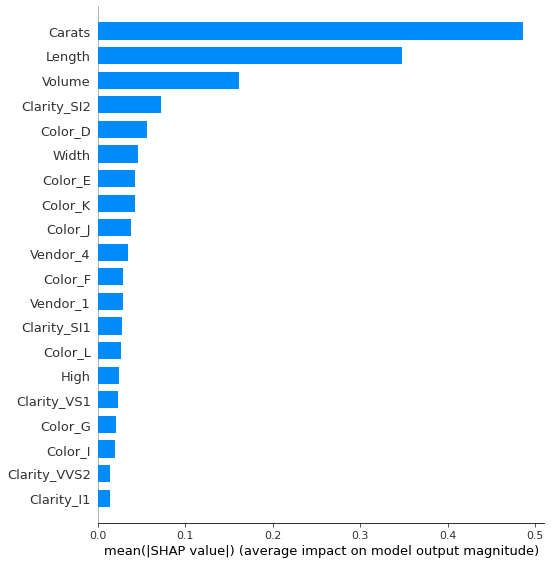

In [ ]:
explainer =  shap.TreeExplainer(best_lgbm_price)
shap_values = explainer.shap_values(Xtrain_price.values)
shap.summary_plot(shap_values, Xtrain_price, plot_type='bar')

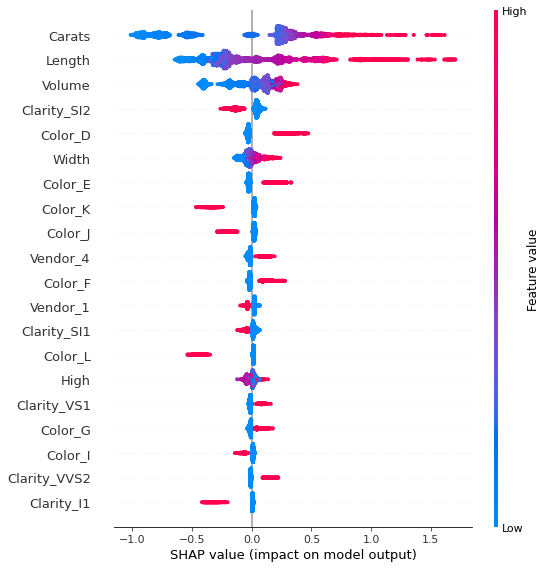

In [ ]:
explainer =  shap.TreeExplainer(best_lgbm_price)
shap_values = explainer.shap_values(Xtrain_price.values)
shap.summary_plot(shap_values, Xtrain_price)

# Data test loading (offers file)
 

In [ ]:
dft = pd.read_csv('offers.csv',encoding='utf-8')

In [ ]:
dft.head()

,id,Carats,Cert,Clarity,Color,Cut,Depth,Fluroescence,Known_Conflict_Diamond,Measurements,Polish,Regions,Shape,Symmetry,Table,Vendor,Offers
0,8051,0.42,AGSL,SI2,L,,62.7,None,NaN,4.81x4.78x3.01,Excellent,Australia,Round,Excellent,57.0,1,NaN
1,8052,0.40,GemEx,VS2,M,,63.8,None,NaN,4.64x4.61x2.95,Excellent,Australia,Round,Excellent,59.0,1,NaN
2,8053,0.41,AGSL,SI2,L,,62.2,None,True,4.76x4.74x2.95,Excellent,DR Congo,Round,Very good,58.0,1,NaN
3,8054,0.40,AGSL,SI1,K,,64.2,Strong Bl..,False,4.63x4.59x2.96,Very good,Angola,Emerald,Very good,58.0,1,NaN
4,8055,0.40,AGSL,VS2,L,,64.3,NaN,False,4.67x4.62x2.99,Excellent,Russia,Round,Very good,NaN,1,NaN


# Data test addapting and cleanning (offers file)

Fluroescence, Table, Cut and Known_Conflict_Diamond are the features with the most lack of information in this base.

Base on the feature importance from the best model (lgbm) we have learned that Flourescence, Table and Cut are not highly important features for predicting Logprice and Logretail.

For Known_Conflict_Diamond beyond playing an important role for logretail there is a moral question on purchasing them. The problem is that mising 88% is too much to handle.

In the "Analysis" part we saw that the country of orign had some variation and this might lead us to classify some of the NAN in the column Known_Conflict_Diamond. 

Angola, Congo and Zimbawe are countries that had conflicts diamonds in the trian dataset and based on that if we do not have the 'Known_Conflict_Diamond' filled in the test dataset we will take them out of the analysis.


In [ ]:
dft.shape

(2683, 17)

In [ ]:
# Dataframe had empty cells not filled with Nan
dft_empty_na = dft.replace(' ', np.nan)

In [ ]:
# check the % of NaN values within the columns.
dft_empty_na.isna().sum()/len(dft_empty_na)

id                        0.000000
Carats                    0.000000
Cert                      0.079389
Clarity                   0.000000
Color                     0.000000
Cut                       0.467015
Depth                     0.185240
Fluroescence              0.192695
Known_Conflict_Diamond    0.886321
Measurements              0.000000
Polish                    0.108461
Regions                   0.000000
Shape                     0.000000
Symmetry                  0.108461
Table                     0.319046
Vendor                    0.000000
Offers                    1.000000
dtype: float64

In [ ]:
# Trian table with the results of known conflit per region
table = pd.pivot_table(df_no_na,index=['Regions'],columns=['Known_Conflict_Diamond'],aggfunc={'id':np.count_nonzero})
table

id      
Known_Conflict_Diamond  False True 
Regions                            
Angola                  109.0  29.0
Australia               204.0   NaN
Botswana                344.0   NaN
Canada                  191.0   NaN
DR Congo                152.0  41.0
Other/Unknown            60.0   NaN
Russia                  589.0   NaN
South Africa            141.0   NaN
Zimbabwe                 25.0   8.0

In [ ]:
#All NAN cells from the column Known_Conflict_Diamond for the countries Australia, Botswana, Canada, Russia and Russia
# will be filled with FALSE in the test database 
for i in ['Australia', 'Botswana', 'Canada', 'Russia', 'Russia', 'Other/Unknown', 'South Africa']:
  dft_empty_na.loc[(dft_empty_na['Regions']==i), 'Known_Conflict_Diamond'] = dft_empty_na.loc[(dft_empty_na['Regions']==i), 'Known_Conflict_Diamond'].fillna(False)
# All the NAN cells from Congo, Angola and Zimbabwe will be considered as TRUE to avoid any risk
for i in ['DR Congo', 'Angola', 'Zimbabwe']:
  dft_empty_na.loc[(dft_empty_na['Regions']==i), 'Known_Conflict_Diamond'] = dft_empty_na.loc[(dft_empty_na['Regions']==i), 'Known_Conflict_Diamond'].fillna(True)

In [ ]:
# Making the same corrections used in the initial base in the measurement column
dft_empty_na['Measurements'] = dft_empty_na['Measurements'].str.replace('*','x')
dft_empty_na['Measurements'] = dft_empty_na['Measurements'].str.replace('X','x')
dft_empty_na['Measurements'] = dft_empty_na['Measurements'].str.replace('-','x')
dft_empty_na['Measurements'] = dft_empty_na['Measurements'].str.replace('+','x')

In [ ]:
# Finaly spliting the column in 3 others
dft_empty_na[['High', 'Length', 'Width']] = dft_empty_na['Measurements'].str.split('x', 3, expand=True)

In [ ]:
#chekcing if we are missing any value to be replaced  
print(dft_empty_na[pd.to_numeric(df['High'], errors='coerce').isnull()])

Empty DataFrame
Columns: [id, Carats, Cert, Clarity, Color, Cut, Depth, Fluroescence, Known_Conflict_Diamond, Measurements, Polish, Regions, Shape, Symmetry, Table, Vendor, Offers, High, Length, Width]
Index: []


Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
#getting those 3 new columns to float64
dft_empty_na = dft_empty_na.astype({'High': 'float64'})
dft_empty_na = dft_empty_na.astype({'Length': 'float64'})
dft_empty_na = dft_empty_na.astype({'Width': 'float64'})

In [ ]:
# creating a new column with the estimated volume
dft_empty_na['Volume'] = dft_empty_na['High']*dft_empty_na['Length']*dft_empty_na['Width']

In [ ]:
#Vendor as object not int
dft_empty_na = dft_empty_na.astype({'Vendor': 'object'})

In [ ]:
#known conflict as bool
dft_empty_na = dft_empty_na.astype({'Known_Conflict_Diamond': 'bool'})

In [ ]:
# The percentage from each value inside the object columns 
col_obj_off = ['Cert', 'Polish', 'Vendor','Symmetry', 'Regions', 'Clarity', 'Shape', 'Color']

for i in col_obj_off:
  print( i , "\n", dft_empty_na[i].value_counts()/len(dft_empty_na)*100, "\n")

Cert 
 AGSL     84.420425
GemEx     7.640701
Name: Cert, dtype: float64 

Polish 
 Excellent    66.380917
Very good    20.089452
Good          2.609020
Fair          0.074543
Name: Polish, dtype: float64 

Vendor 
 2    39.955274
1    33.954529
3    13.715990
4    12.374208
Name: Vendor, dtype: float64 

Symmetry 
 Excellent    57.472978
Very good    25.232948
Good          6.187104
Fair          0.223630
Faint         0.037272
Name: Symmetry, dtype: float64 

Regions 
 Russia           33.395453
Botswana         16.585911
Australia        11.069698
DR Congo         10.547894
Canada            9.727917
Angola            6.783451
South Africa      6.485278
Other/Unknown     3.391726
Zimbabwe          2.012672
Name: Regions, dtype: float64 

Clarity 
 SI2     29.146478
SI1     26.723817
VS2     18.225867
VS1     14.386880
VVS2     4.584420
VVS1     3.019009
IF       1.938129
I1       1.826314
I3       0.074543
I2       0.074543
Name: Clarity, dtype: float64 

Shape 
 Round       55.49757

In [ ]:
# No fair data of polish in the training dataframe
dft_empty_na['Polish'].replace({ 'Fair':np.nan}, inplace=True)

In [ ]:
# No faint classification on Simmetry
dft_empty_na['Symmetry'].replace({ 'Faint':np.nan}, inplace=True)

In [ ]:
#Shape classification
dft_empty_na['Shape'].replace({ 'ROUND':'Round', 'Oval ':'Oval', 'Marquis':'Marquise',
                              'Marwuise':'Marquise'}, inplace=True)

In [ ]:
#Color classification. All F"something" will be grouped and Fancy
dft_empty_na['Color'].replace({ 'Ffancy darkbrown':'Fancy', 'N':'N-R' , 'T':'S-Z', 'S-t':'S-Z'}, inplace=True)

In [ ]:
#Now the columns Table and Cut will be dropped of the test dataframe nad also NaN values will be droped
dft_no_cut_table = dft_empty_na.drop(['Cut', 'Table', 'Offers', 'Fluroescence', 'id', 'Measurements'], axis=1)
dft_no_na_no_cut_table = dft_no_cut_table.dropna()
dft_no_na_no_cut_table.shape

(1790, 15)

In [ ]:
dft_no_na_no_cut_table.isna().sum()/len(dft_no_na_no_cut_table)

Carats                    0.0
Cert                      0.0
Clarity                   0.0
Color                     0.0
Depth                     0.0
Known_Conflict_Diamond    0.0
Polish                    0.0
Regions                   0.0
Shape                     0.0
Symmetry                  0.0
Vendor                    0.0
High                      0.0
Length                    0.0
Width                     0.0
Volume                    0.0
dtype: float64

In [ ]:
dft_no_na_no_cut_table.dtypes

Carats                    float64
Cert                       object
Clarity                    object
Color                      object
Depth                     float64
Known_Conflict_Diamond       bool
Polish                     object
Regions                    object
Shape                      object
Symmetry                   object
Vendor                     object
High                      float64
Length                    float64
Width                     float64
Volume                    float64
dtype: object

In [ ]:
dft_clean = dft_no_na_no_cut_table

In [ ]:
dft_clean.shape

(1790, 15)

In [ ]:
X_offers = dft_clean

In [ ]:
X_offers_dmm = pd.get_dummies(X_offers)

In [ ]:
X_offers_dmm['Clarity_FL'] = 0

In [ ]:
X_offers_dmm['Clarity_I3'] = 0

In [ ]:
X_offers_dmm['Clarity_None'] = 0

In [ ]:
X_offers_dmm.columns

Index(['Carats', 'Depth', 'Known_Conflict_Diamond', 'High', 'Length', 'Width',
       'Volume', 'Cert_AGSL', 'Cert_GemEx', 'Clarity_I1', 'Clarity_I2',
       'Clarity_IF', 'Clarity_SI1', 'Clarity_SI2', 'Clarity_VS1',
       'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2', 'Color_D', 'Color_E',
       'Color_F', 'Color_Fancy', 'Color_G', 'Color_H', 'Color_I', 'Color_J',
       'Color_K', 'Color_L', 'Color_M', 'Color_N-R', 'Color_S-Z',
       'Polish_Excellent', 'Polish_Good', 'Polish_Very good', 'Regions_Angola',
       'Regions_Australia', 'Regions_Botswana', 'Regions_Canada',
       'Regions_DR Congo', 'Regions_Other/Unknown', 'Regions_Russia',
       'Regions_South Africa', 'Regions_Zimbabwe', 'Shape_Asscher',
       'Shape_Cushion', 'Shape_Emerald', 'Shape_Marquise', 'Shape_Oval',
       'Shape_Pear', 'Shape_Princess', 'Shape_Radiant', 'Shape_Round',
       'Shape_Uncut', 'Symmetry_Excellent', 'Symmetry_Fair', 'Symmetry_Good',
       'Symmetry_Very good', 'Vendor_1', 'Vendor_2', 'Vend

In [ ]:
X_offers_dmm = X_offers_dmm[['Carats', 'Depth', 'Known_Conflict_Diamond', 'High', 'Length', 'Width',
       'Volume', 'Cert_AGSL', 'Cert_GemEx','Clarity_FL','Clarity_I1', 'Clarity_I2','Clarity_I3',
       'Clarity_IF','Clarity_None','Clarity_SI1', 'Clarity_SI2', 'Clarity_VS1',
       'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2', 'Color_D', 'Color_E',
       'Color_F', 'Color_Fancy', 'Color_G', 'Color_H', 'Color_I', 'Color_J',
       'Color_K', 'Color_L', 'Color_M', 'Color_N-R', 'Color_S-Z',
       'Polish_Excellent', 'Polish_Good', 'Polish_Very good', 'Regions_Angola',
       'Regions_Australia', 'Regions_Botswana', 'Regions_Canada',
       'Regions_DR Congo', 'Regions_Other/Unknown', 'Regions_Russia',
       'Regions_South Africa', 'Regions_Zimbabwe', 'Shape_Asscher',
       'Shape_Cushion', 'Shape_Emerald', 'Shape_Marquise', 'Shape_Oval',
       'Shape_Pear', 'Shape_Princess', 'Shape_Radiant', 'Shape_Round',
       'Shape_Uncut', 'Symmetry_Excellent', 'Symmetry_Fair', 'Symmetry_Good',
       'Symmetry_Very good', 'Vendor_1', 'Vendor_2', 'Vendor_3', 'Vendor_4'
       ]]

In [ ]:
X_offers_dmm.head()

,Carats,Depth,Known_Conflict_Diamond,High,Length,Width,Volume,Cert_AGSL,Cert_GemEx,Clarity_FL,Clarity_I1,Clarity_I2,Clarity_I3,Clarity_IF,Clarity_None,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Color_D,Color_E,Color_F,Color_Fancy,Color_G,Color_H,Color_I,Color_J,Color_K,Color_L,Color_M,Color_N-R,Color_S-Z,Polish_Excellent,Polish_Good,Polish_Very good,Regions_Angola,Regions_Australia,Regions_Botswana,Regions_Canada,Regions_DR Congo,Regions_Other/Unknown,Regions_Russia,Regions_South Africa,Regions_Zimbabwe,Shape_Asscher,Shape_Cushion,Shape_Emerald,Shape_Marquise,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Shape_Uncut,Symmetry_Excellent,Symmetry_Fair,Symmetry_Good,Symmetry_Very good,Vendor_1,Vendor_2,Vendor_3,Vendor_4
0,0.42,62.7,False,4.81,4.78,3.01,69.205318,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,0.40,63.8,False,4.64,4.61,2.95,63.101680,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,0.41,62.2,True,4.76,4.74,2.95,66.559080,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,0.40,64.2,False,4.63,4.59,2.96,62.905032,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,0.40,64.3,False,4.67,4.62,2.99,64.510446,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [ ]:
X_offers_dmm.shape

(1790, 64)

# Applying the models for the "offers" base 

In [ ]:
price_offer = best_lgbm.predict(X_offers_dmm)

In [ ]:
retial_offer = best_lgbm_price.predict(X_offers_dmm)

In [ ]:
X_offers['Logprice'] = price_offer


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X_offers['Logretail'] = retial_offer


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X_offers['Retail'] = np.exp(X_offers['Logretail'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X_offers['Offers'] = np.exp(X_offers['Logprice'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X_offers['Profit'] = X_offers['Offers']-X_offers['Retail']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X_offers['id'] = dft_empty_na['id']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
cols = list(X_offers.columns)
X_offers = X_offers[cols[::-1]]

In [ ]:
df_sub = X_offers.sort_values(by='Profit', ascending=False).head(15)

In [ ]:
df_sub

,id,Profit,Offers,Retail,Logretail,Logprice,Volume,Width,Length,High,Vendor,Symmetry,Shape,Regions,Polish,Known_Conflict_Diamond,Depth,Color,Clarity,Cert,Carats
2314,10365,289010.974943,592229.263399,303218.288456,12.622208,13.291649,863.563680,6.68,11.40,11.34,2,Very good,Round,Russia,Excellent,False,58.7,E,VVS2,AGSL,5.04
1321,9372,196764.871692,694504.560066,497739.688374,13.117833,13.450954,1067.475222,7.37,12.06,12.01,2,Excellent,Round,Australia,Excellent,False,61.2,F,VS2,AGSL,6.53
2389,10440,171075.154297,369704.284774,198629.130477,12.199195,12.820459,601.905920,6.16,9.92,9.85,2,Excellent,Oval,Canada,Excellent,False,62.3,F,IF,AGSL,3.68
1317,9368,156745.984335,418270.294595,261524.310260,12.474283,12.943883,1203.037980,7.62,12.58,12.55,2,Excellent,Round,Botswana,Excellent,False,60.7,H,SI1,AGSL,7.34
2380,10431,154926.088247,436399.098758,281473.010511,12.547792,12.986312,1444.890636,8.28,13.23,13.19,2,Excellent,Round,Russia,Excellent,False,62.7,J,VS1,AGSL,8.81
1313,9364,121026.970767,335916.602709,214889.631941,12.277880,12.724618,1165.572020,7.55,12.44,12.41,2,Excellent,Round,South Africa,Excellent,False,60.8,J,SI1,AGSL,7.12
1320,9371,116407.830184,423327.423239,306919.593055,12.634341,12.955901,1258.042500,7.80,12.75,12.65,2,Excellent,Princess,Other/Unknown,Excellent,False,61.4,H,VS2,AGSL,7.71
1717,9768,88314.261861,269203.770663,180889.508802,12.105642,12.503224,802.519536,6.83,10.92,10.76,2,Good,Princess,Russia,Very good,False,63.0,H,VVS1,AGSL,5.03
1312,9363,86762.501929,254953.981161,168191.479232,12.032858,12.448838,1187.246560,7.55,12.56,12.52,2,Excellent,Round,Botswana,Excellent,False,60.2,K,SI1,AGSL,7.17
1631,9682,81554.186509,269030.983816,187476.797308,12.141410,12.502582,1692.326115,8.81,13.77,13.95,2,Very good,Round,Canada,Excellent,False,63.6,K,VS2,AGSL,10.05


In [ ]:
df_sub.shape

(15, 21)

In [ ]:
df_sub.to_csv(r'df_sub.csv', index = False)

# Questions made for the case

1. Do you think that any of the vendors are over or under charging for diamonds compared 
to the other vendors? Do you think they are selling the same kind of diamonds? How did 
you come to this conclusion?

Yes there are some interesting variations on vendors.
Vendor 1 with "flat" Prices, Vendor 2 with a wide range of prices variation are the ones that call more the attention. (check out boxplot).

To check why those variations happens we will make deep dive on the most important features for the price model that are: Carats, Clarity, Volume (Lenght) and Color

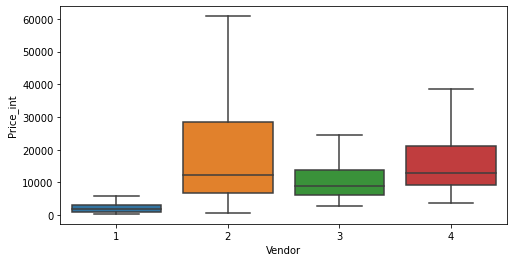

In [ ]:
# Visualization from Prices and each one of the categorical data
plt.figure(figsize=(8,4))
sns.boxplot(x='Vendor', y='Price_int', data=df_no_na_no_cut_table, showfliers=False)
plt.show()
# Vendor 1 calling our atention.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

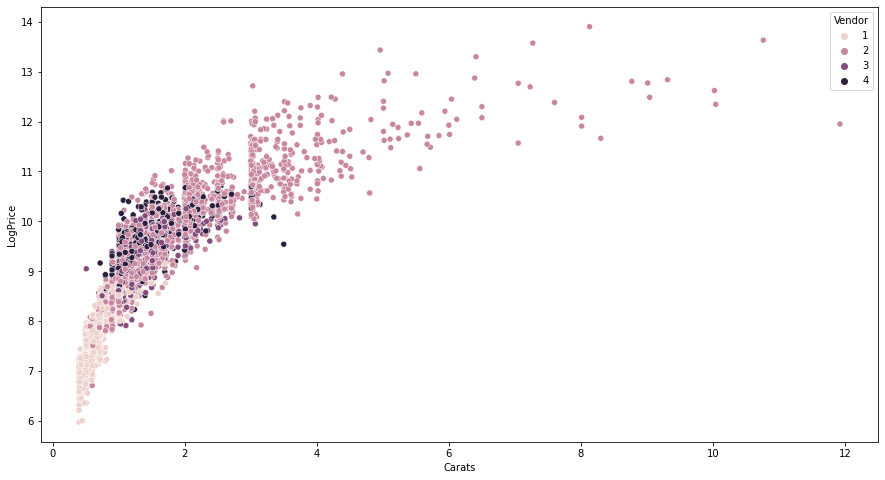

In [ ]:
# Vendor 1 focused on lower Carats and LogPrices
# Vendor 4 and 3 in the same region of LogPrices and Carats
# Vendor 2 working with higher Carats and also LopPrices
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_no_na_no_cut_table, x="Carats", y="LogPrice", hue="Vendor")

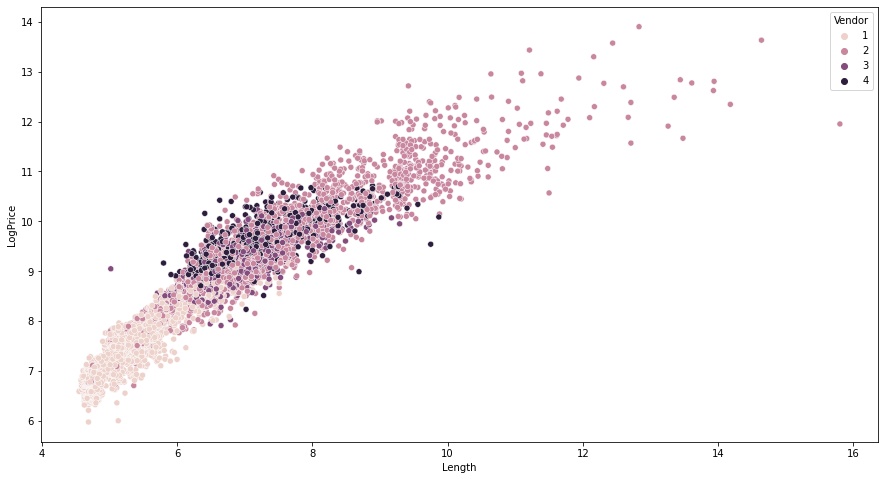

In [ ]:
# Vendor 1 focused on lower Lenght and LogPrices
# Vendor 4 and 3 in the same region of LogPrices and Lenght
# Vendor 2 working with higher Lenghts and also LopPrices
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_no_na_no_cut_table, x="Length", y="LogPrice", hue="Vendor")

In [ ]:
# Clarity SI2 as the most importat the help defining the logPrice
# Based on chap analysis we can see higher SI2 quantidy lower the price. 
# This also can explain 1 with lower prices then the rest and 2 with 
# higher dispersion on the logprices because of the quantity of FL and IF.
vendor_clarity = pd.pivot_table(df_no_na_no_cut_table,index=['Clarity'],columns=['Vendor'],aggfunc={'id':np.count_nonzero})
vendor_clarity/len(df_no_na_no_cut_table)*100

id                               
Vendor          1          2         3         4
Clarity                                         
FL            NaN   0.018302       NaN       NaN
I1       1.098097   0.347731  0.329429  0.091508
I2       0.109810   0.054905  0.018302       NaN
I3       0.018302        NaN       NaN       NaN
IF       0.128111   0.951684  0.237921  0.292826
None          NaN        NaN  0.018302       NaN
SI1      9.242313  11.292094  3.953148  3.715227
SI2      9.004392  10.377013  4.062958  3.459004
VS1      3.989751   6.094436  1.756955  1.702050
VS2      6.515373   7.869693  2.489019  2.507321
VVS1     1.006589   1.299414  0.329429  0.274524
VVS2     1.866764   2.287701  0.512445  0.677160

In [ ]:
# We also can see an important variation in the concentration of D diamonds for 1 and 2
vendor_clarity = pd.pivot_table(df_no_na_no_cut_table,index=['Color'],columns=['Vendor'],aggfunc={'id':np.count_nonzero})
vendor_clarity/len(df_no_na_no_cut_table)*100

id                              
Vendor         1         2         3         4
Color                                         
D       3.056369  4.538799  1.555637  1.262811
E       5.069546  5.032943  1.445827  1.500732
F       5.014641  5.124451  1.464129  1.262811
Fancy   0.036603  0.054905  0.036603       NaN
G       4.428990  6.131040  2.013177  2.104685
H       3.678624  6.094436  2.379209  1.830161
I       3.916545  6.167643  2.049780  2.232796
J       3.404100  3.623719  1.628843  1.555637
K       2.306003  2.525622  0.805271  0.677160
L       1.445827  0.896779  0.292826  0.219619
M       0.585652  0.347731  0.036603  0.054905
N-R          NaN  0.036603       NaN  0.018302
S-Z     0.036603  0.018302       NaN       NaN

2. What is the relationship between Carat and Retail Price? Why do you think the 
relationship takes this form?

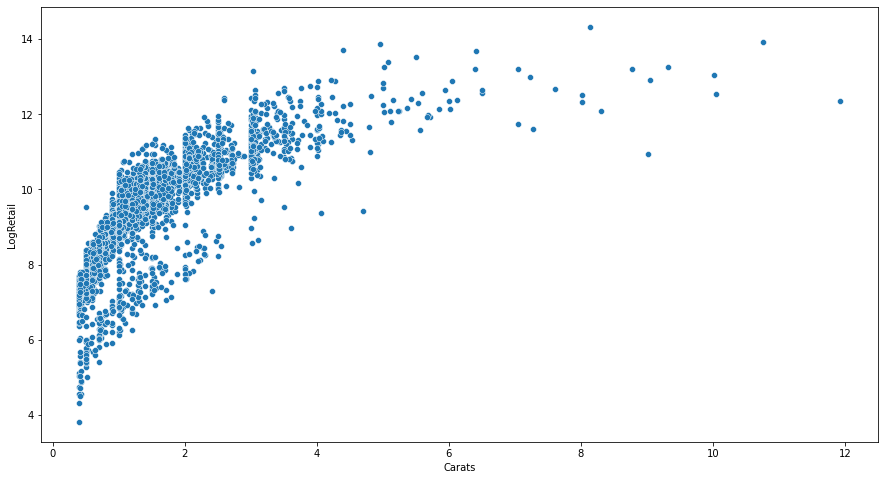

In [ ]:
# We can see a non linear relation between LogRetail and Carats
# Also we can see in the shap analysis from the model for LogRetial, the Carats Variable as the 8th
# most important variable and as its values increases we can see the prices jumping high
# see the topic "Feature Importance Log Retail" 
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_no_na_no_cut_table, x="Carats", y="LogRetail")